In [3]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

## Defining all the functions
1. standardizeData -- To standardize the data using sklearn 
2. crossValScore -- to perform cross validation and return the score
3. crossValPredict -- to perform cross validation and return the predicted value
4. testTrainSlipt -- to split the test and train split on data

In [4]:
# standardizes the data to get better regression fit.
#another scaling technique is called Robust scaler that removes the median and scales the data in IQR
def standardizeData(data):
    scaler = StandardScaler()
    car_Prepared = pd.DataFrame(scaler.fit_transform(cars))

# cross validation score is a sklearn API that performs k fold cross validation on a given input data, estimator 
# and error scoring and return a list of score of k value

def crossValScore(est,car_Prepared,cars_price,errVal,cv):
    scores = cross_val_score(est, car_Prepared, cars_price,scoring=errVal, cv=cv)
    if errVal =='neg_mean_squared_error':
        scores = np.sqrt(-scores)
    display_scores(scores)
    return scores

# cross validation predict is a sklearn API that performs k fold cross validation on a given input data and estimator 
# and return the predicted value

def crossValPredict(est,car_Prepared,cars_price, cv):
    y = cross_val_predict(est, car_Prepared, cars_price, cv = cv)
    return y
# train_test_split is a sklearn API that performs a random split with the specified test size on the input data
# and returns test and train data.
def testTrainSlipt(data, testSize):
    train_set, test_set = train_test_split(data, test_size = testSize, random_state = 42)
    return train_set, test_set

1. r2score -- to calculate the r2 score for predicted value
2. rootmeanSqError -- to calculate the root mean score error for predicted value

In [5]:
def r2Score(x,y):
    z = metrics.r2_score(x, y)
    return z

def rootmeanSqError(x,y):
    final_mse = mean_squared_error(x, y)
    final_rmse = np.sqrt(final_mse)
    return final_rmse

1. display_scores -- to calculate mean, standard deviation of the list
2. removePriceColumn -- to remove price column from the data and return price column and data separately

In [6]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def removePriceColumn(data):
    price = data["price"].copy()
    data_M = data.drop("price", axis=1)
    return price, data_M

1. randomForest -- to fit the random forest model
2. randomForest_Predict -- to predict the value using fitted random forest model
3. linearRegression -- to fit the linear regression model
4. linearRegression_Predict -- to predict the value using fitted linear regression model
5. decisionTree -- to fit the decision model model
6. decisionTree_Predict -- to predict the value using fitted decision tree regression model
7. recursiveFeatureExtraction -- it is a sklearn API for Feature ranking with recursive feature elimination

In [7]:
def randomForest(i, cv, train = [], value= []):
    forest_reg = RandomForestRegressor(n_estimators=i,random_state=42, n_jobs =-1, max_depth = 15)
    if cv != True:
        forest_reg.fit(train, value)
    return forest_reg
    
    
def randomForest_Predict(forest_reg, test):
    return forest_reg.predict(test)

def linearRegression(cv,train = [], value=[]):
    LRmodel = LinearRegression(n_jobs = -1)
    if cv != True:
        LRmodel.fit(train, value)
    return LRmodel
    

def linearRegression_Predict(LRmodel, test):
    return LRmodel.predict(test)

def decisionTree(cv,train = [],value= []):
    tree_reg = DecisionTreeRegressor(random_state=42)
    if cv != True:
        tree_reg.fit(train,value)
    return tree_reg

def decisionTree_Predict(tree_reg,test):
    return tree_reg.predict(test)

def recursiveFeatureElimination(model, features,train,value):
    selector = RFE(model, features,step=1)
    selector = selector.fit(train, value)
    return selector.ranking_

## Reading data and deleting the below columns from it:
['make','engine', 'model','trim', 'longitude', 'latitude','sales_week','sales_date', 'transaction_id']

In [8]:
car_Initial = pd.read_csv('hw_data_set_1.csv')
del_cols = ['make','engine', 'model','trim', 'longitude', 'latitude','sales_week','sales_date', 'transaction_id']

car_Initial.drop(del_cols,axis=1,inplace=True)

cat= car_Initial.columns[car_Initial.dtypes==object]
le= LabelEncoder()

for col in cat:
    car_Initial[col]= le.fit_transform(car_Initial[col])

## Creating two datasets:
1. car_Initial -- it contains all the records
2. car_Modified -- it contains all the records whose price is less than 100,000 (removing the outliers)

In [9]:
car_Modified = car_Initial[car_Initial.price <70000]

train_set_I, test_set_I = train_test_split(car_Initial, test_size = 0.2, random_state = 42)
train_set_M, test_set_M = train_test_split(car_Modified, test_size = 0.2, random_state = 42)



#price_M, car_M = removePriceColumn(car_Modified)
price_train_I, car_train_I = removePriceColumn(train_set_I)
price_test_I, car_test_I = removePriceColumn(test_set_I)

price_train_M, car_train_M = removePriceColumn(train_set_M)
price_test_M, car_test_M = removePriceColumn(test_set_M)


price_car_Modified, data_car_Modified = removePriceColumn(car_Modified)
price_car_Initial, data_car_Initial = removePriceColumn(car_Initial)

## Lets try different regression model

## Performing linear regression
 fitting the model on car_modified train data and predicting the price for both car_Modified test and car_Initial test

In [8]:
linearReg_M = linearRegression(False, car_train_M, price_train_M)
linearReg_Out_M = linearRegression_Predict(linearReg_M, car_test_M)

linearReg_r2_M = r2Score(linearReg_Out_M,price_test_M)
linearReg_rmse_M = rootmeanSqError(linearReg_Out_M,price_test_M)

#linearReg_I = linearRegression(car_train_I, price_train_I)
linearReg_Out_I = linearRegression_Predict(linearReg_M, car_test_I)

linearReg_r2_I = r2Score(linearReg_Out_I,price_test_I)
linearReg_rmse_I = rootmeanSqError(linearReg_Out_I,price_test_I)

print("rmse: M=",linearReg_rmse_M, ", I=",linearReg_rmse_I )
print("r2: M=",linearReg_r2_M, ", I=",linearReg_r2_I )

rmse: M= 1329.77259958 , I= 14214.6050941
r2: M= 0.981849092061 , I= -0.887560981974


## Performing cross validation on linear regression

performing the 10 fold cross validation on linear regression with the car_Modified dataset

In [12]:
linearReg = linearRegression(True)
print('RMSE error')
linearRegCrossVal_RMSE = crossValScore(linearReg,data_car_Modified,price_car_Modified,'neg_mean_squared_error',10)
print('\nR2 error')
linearRegCrossVal_r2 = crossValScore(linearReg,data_car_Modified,price_car_Modified,'r2',10)

RMSE error
Scores: [ 1455.21347757  1427.47757485  1453.46596974  1285.46331065  1445.5689155
  1480.05497644  1412.71797544  1413.18001772  1391.02471036  1374.67913298]
Mean: 1413.88460612
Standard deviation: 52.3406846432

R2 error
Scores: [ 0.97870018  0.97988539  0.97883219  0.98324035  0.97937488  0.97809482
  0.97999682  0.98047512  0.98046218  0.98071206]
Mean: 0.979977399427
Standard deviation: 0.00136117789922


## Performing decision tree regression

 fitting the decision tree regression model on car_modified train data and predicting the price for both car_Modified test and car_Initial test

In [9]:
decisionTreeReg_M = decisionTree(False,car_train_M, price_train_M)
decisionTreeReg_Out_M = decisionTree_Predict(decisionTreeReg_M, car_test_M)

decisionTreeReg_r2_M = r2Score(decisionTreeReg_Out_M,price_test_M)
decisionTreeReg_rmse_M = rootmeanSqError(decisionTreeReg_Out_M,price_test_M)

#decisionTreeReg_I = decisionTree(car_train_I, price_train_I)
decisionTreeReg_Out_I = decisionTree_Predict(decisionTreeReg_M, car_test_I)

decisionTreeReg_r2_I = r2Score(decisionTreeReg_Out_I,price_test_I)
decisionTreeReg_rmse_I = rootmeanSqError(decisionTreeReg_Out_I,price_test_I)

print("rmse: M--",decisionTreeReg_rmse_M, ", I--",decisionTreeReg_rmse_I )
print("r2: M--",decisionTreeReg_r2_M, ", I--",decisionTreeReg_r2_I)

rmse: M-- 1930.73690487 , I-- 14182.4000801
r2: M-- 0.962668517513 , I-- -0.90662162794


## Performing cross validation on decision tree regression
performing the 10 fold cross validation on decision tree regression with the car_Modified dataset

In [13]:
decisionTreeReg= decisionTree(True)
print('RMSE error')
decisionTreeCrossVal_RMSE = crossValScore(decisionTreeReg,data_car_Modified,price_car_Modified,'neg_mean_squared_error',10)
print('\nR2 error')
decisionTreeCrossVal_r2 = crossValScore(decisionTreeReg,data_car_Modified,price_car_Modified,'r2',10)

RMSE error
Scores: [ 1774.58457094  1993.54560356  2144.86900968  1720.89682504  1774.52383518
  1868.67615332  2106.99805847  1876.24583307  1699.75260062  1873.22535902]
Mean: 1883.33178489
Standard deviation: 146.524436647

R2 error
Scores: [ 0.96832505  0.96076935  0.95390353  0.96996309  0.96891989  0.96508121
  0.95550447  0.96558301  0.97082722  0.96418515]
Mean: 0.964306197371
Standard deviation: 0.00558929440767


## Performing random forest regression

fitting the random forest regression model with different a range of trees on car_modified train data and predicting the price for both car_Modified test and car_Initial test

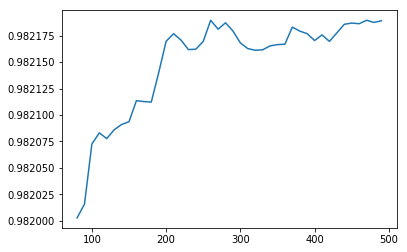

In [16]:
r2_RandomForest = []
rmse_RandomForest = []
r2_RandomForest_I = []
rmse_RandomForest_I = []
iteration = []
for i in range(80,500,10):
    #print("Number of trees in forest: ",i)
    iteration.append(i)
    randomForestReg_M = randomForest(i,False,car_train_M, price_train_M)
    randomForestReg_Out_M = randomForest_Predict(randomForestReg_M, car_test_M)

    r2_RandomForest.append(r2Score(randomForestReg_Out_M,price_test_M))
    rmse_RandomForest.append(rootmeanSqError(randomForestReg_Out_M,price_test_M))

    
    randomForestReg_Out_I = randomForest_Predict(randomForestReg_M, car_test_I)

    r2_RandomForest_I.append(r2Score(randomForestReg_Out_I,price_test_I))
    rmse_RandomForest_I.append(rootmeanSqError(randomForestReg_Out_I,price_test_I))

    #print("rmse: M--",randomForestReg_rmse_M, ", I--",randomForestReg_rmse_I )
    #print("r2: M--",randomForestReg_r2_M, ", I--",randomForestReg_r2_I,'\n')
    
plt.plot(iteration, r2_RandomForest)

It is evident from the above graph that the r2 score does not changes significantly over the range of 80 to 500 so I am choosing 135 trees.

## Performing cross validation on random forest regression
performing the 10 fold cross validation on random forest regression with the car_Modified dataset

In [36]:
randomForestReg = randomForest(135,True)
print('RMSE error')
randomCrossVal_RMSE = crossValScore(randomForestReg, data_car_Modified,price_car_Modified,'neg_mean_squared_error',10)
print('\nR2 error')
randomCrossVal_r2 = crossValScore(randomForestReg,data_car_Modified,price_car_Modified,'r2',10)

RMSE error
Scores: [ 1443.58330168  1429.94185162  1472.2269776   1252.94512249  1444.04561003
  1463.59382159  1432.79404138  1407.96928542  1353.83145526  1378.4135655 ]
Mean: 1407.93450326
Standard deviation: 62.2326166748

R2 error
Scores: [ 0.97903928  0.97981588  0.97828221  0.98407756  0.97941833  0.97857937
  0.97942425  0.98061884  0.98149302  0.98060713]
Mean: 0.980135585487
Standard deviation: 0.00161304083777


## Performing K nearset neighbours regression

fitting the K nearset neighbours regression model for a range of k values on car_modified train data and predicting the price for both car_Modified test and car_Initial test

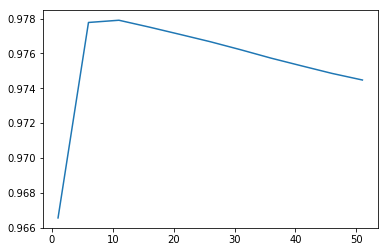

In [11]:
r2_KNN = []
rmse_KNN = []
r2_KNN_I = []
rmse_KNN_I = []
iteration_KNN = []
for i in range(1,52,5):
    #print("Number of neighbors: ", i)
    iteration_KNN.append(i)
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit (car_train_M, price_train_M) 
    predictM = reg.predict(car_test_M)
    predictI = reg.predict(car_test_I)

    r2_KNN.append(r2Score(predictM,price_test_M))
    rmse_KNN.append(rootmeanSqError(predictM,price_test_M))
    
    r2_KNN_I.append(r2Score(predictI,price_test_I))
    rmse_KNN_I.append(rootmeanSqError(predictI,price_test_I))

    #print("rmse: M--",rmse_M, ", I--",rmse_I )
    #print("r2: M--",r2_M, ", I--",r2_I,'\n')
plt.plot(iteration_KNN, r2_KNN)

## Performing svr rbc kernel regression

In [11]:
clf = SVR(kernel = 'rbf',C=1.0, epsilon=0.2,verbose = 1)
clf.fit(car_train_M, price_train_M) 

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=1)

In [13]:
out_SVR = clf.predict(car_test_M)
r2_score = r2Score(out_SVR,price_test_M)
rmse_score = rootmeanSqError(out_SVR,price_test_M)

#decisionTreeReg_I = decisionTree(car_train_I, price_train_I)
out_SVR_I = clf.predict(car_test_I)
r2_score_I = r2Score(out_SVR_I,price_test_I)
rmse_score_I = rootmeanSqError(out_SVR_I,price_test_I)
print("rmse: M--",rmse_score, ", I--",rmse_score_I )
print("r2: M--",r2_score, ", I--",r2_score_I,'\n')

rmse: M-- 9965.39203222 , I-- 17620.6749315
r2: M-- -437315898.129 , I-- -230877653.813 



## Feature Importance

Before performing the regression on the test data lets analyze the feature importance

In [35]:
rankFeatures = recursiveFeatureElimination(randomForestReg, 1,data_car_Modified,price_car_Modified )
rankFeatures

array([18,  4, 14, 17, 16,  6,  1,  8,  9,  2,  5, 15, 10, 13, 11, 12,  3,
        7])

In [40]:
colList = list(data_car_Modified.columns)

FeatureImportance = zip(rankFeatures, colList)
FeatureImportance = sorted(FeatureImportance)
print(FeatureImportance)

[(1, 'transaction_msrp'), (2, 'zip'), (3, 'trim_id'), (4, 'model_id'), (5, 'State'), (6, 'base_msrp'), (7, 'make_id'), (8, 'destination'), (9, 'bodytype'), (10, 'customercash'), (11, 'lease'), (12, 'cash'), (13, 'finance'), (14, 'drive_type'), (15, 'dealercash'), (16, 'transmission'), (17, 'door'), (18, 'year')]


## Conclusion:

## Comparing the above 5 results we can infer that random forest performs best

## Final Prediction

I will be using random forest for car price prediction with number of trees = 135.

In [67]:
#Reading the test file
car_TestFile_Input = pd.read_csv('hw_data_set_2.csv')
del_cols = ['make','engine', 'model','trim', 'longitude', 'latitude','sales_week','sales_date', 'transaction_id']
car_TestFile = car_TestFile_Input.drop(del_cols,axis=1)

cat= car_TestFile.columns[car_TestFile.dtypes==object]
le= LabelEncoder()

for col in cat:
    car_TestFile[col]= le.fit_transform(car_TestFile[col])

In [73]:
missing_values = car_TestFile.isnull().sum()
missing_values

year                0
model_id            0
drive_type          0
door                0
transmission        0
base_msrp           0
transaction_msrp    0
destination         0
bodytype            0
zip                 0
State               0
dealercash          0
customercash        0
finance             0
lease               0
cash                0
trim_id             0
make_id             0
dtype: int64

In [68]:
randomForestReg_Final = randomForest(135,False,data_car_Modified,price_car_Modified)
randomForestReg_Out_M = randomForest_Predict(randomForestReg_Final, car_TestFile)

In [70]:
car_TestFile_Input['price'] = pd.Series(randomForestReg_Out_M, index=car_TestFile_Input.index)

In [71]:
car_TestFile_Input.head()

,sales_week,sales_date,transaction_id,year,make,model_id,model,drive_type,door,transmission,...,customercash,finance,lease,cash,trim,trim_id,make_id,longitude,latitude,price
0,24OCT2009,24OCT2009,16272160,2010,BMW,60891,3 Series,RWD,4,Manual,...,0,0,1,0,4dr Sdn 328i RWD,1622188,2359,-86.765654,36.165353,34806.931075
1,24OCT2009,24OCT2009,16209273,2010,BMW,60891,3 Series,RWD,2,Manual,...,0,1,0,0,2dr Conv 328i,1622168,2359,-86.497541,33.592120,45186.901416
2,24OCT2009,24OCT2009,14586748,2010,BMW,60891,3 Series,RWD,4,Automatic,...,0,0,0,1,4dr Sdn 335d RWD,1622233,2359,-97.179563,33.359586,43289.115313
3,24OCT2009,24OCT2009,16262283,2010,BMW,60891,3 Series,RWD,4,Manual,...,0,0,0,1,4dr Sdn 328i RWD,1622188,2359,-84.319565,42.003218,33899.454526
4,24OCT2009,24OCT2009,10113511,2010,BMW,60891,3 Series,RWD,4,Manual,...,0,1,0,0,4dr Sdn 328i RWD,1622188,2359,-122.547172,48.023245,35711.305682


In [76]:
car_TestFile_Input.to_csv('hw_data_set_2.csv', index = False)

## Excel comparision

In [14]:
randomForestReg_test = randomForest(135,False,car_train_M, price_train_M)
randomForestReg_Outvalue = randomForest_Predict(randomForestReg_test, car_test_I)

car_test_I['price'] = pd.Series(price_test_I, index=car_test_I.index)
car_test_I['Predictedprice'] = pd.Series(randomForestReg_Outvalue, index=car_test_I.index)
car_test_I.to_csv('test.csv', index = False)